# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

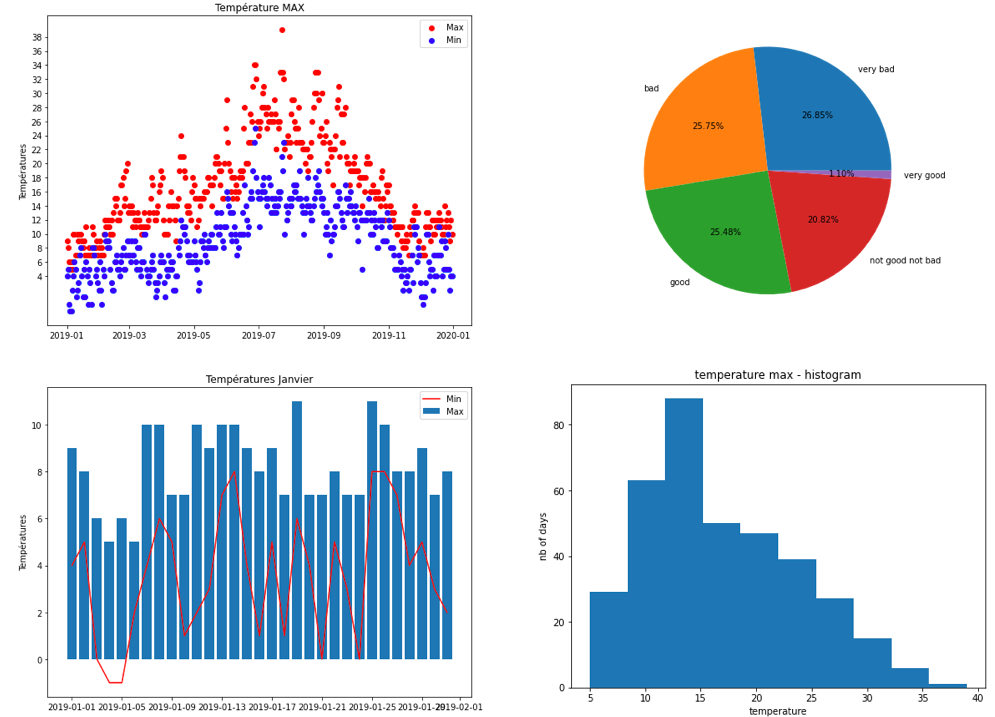

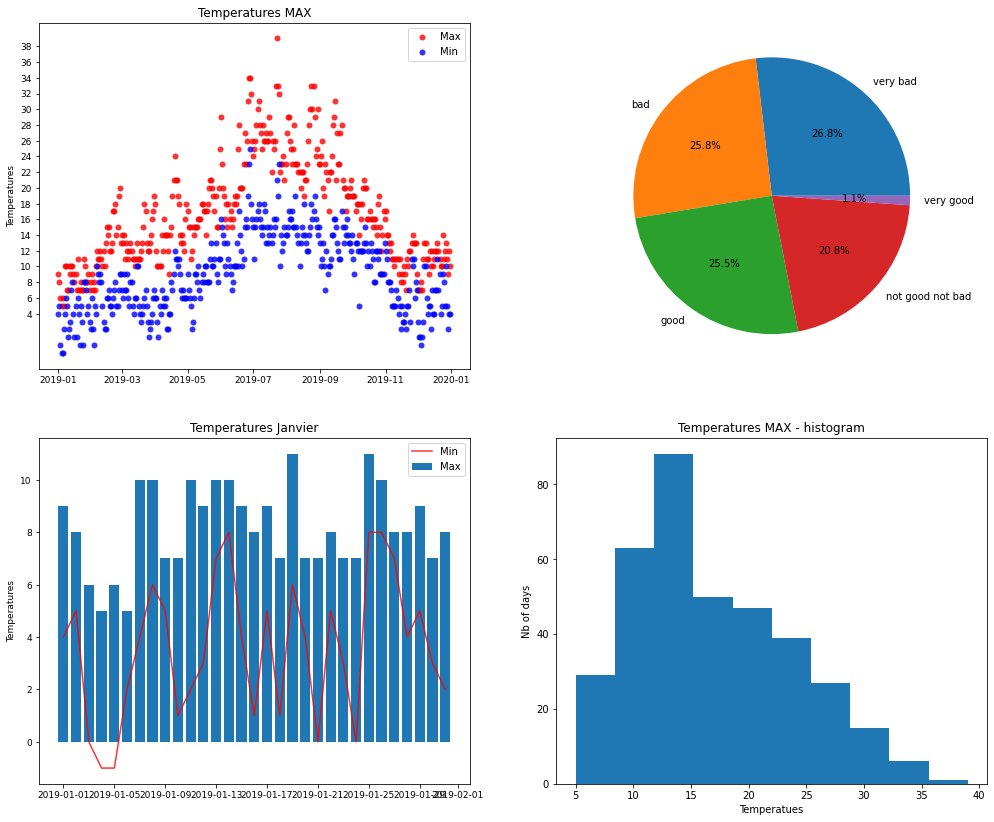

In [ ]:
fig, ax = plt.subplots(figsize = (17,14))


#1er graph
ax1 = plt.subplot(221) 
ax1.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], label ='Max', c= 'red', lw = 0, alpha=0.8)
ax1.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], label ='Min', c= 'blue',lw = 0, alpha=0.8) 
ax1.legend()
ax1.set_title('Temperatures MAX')
ax1.set_ylabel('Temperatures', fontsize=9)
ax1.set_yticks(range(4,39,2))
ax1.tick_params(axis='both', labelsize=9)

#2eme graph
ax2 = plt.subplot(222) 
df_weather['OPINION'].value_counts().plot(kind='pie',autopct="%1.1f%%")
ax2.set_ylabel('')

#3eme graph
ax3 = plt.subplot(223) 
dfJan = df_weather.loc[(df_weather["DATE"] >= '2019-01-01') & (df_weather["DATE"] <= '2019-01-31')]
ax3.bar(dfJan["DATE"],dfJan["MAX_TEMPERATURE_C"], label ='Max')
ax3.plot(dfJan["DATE"],dfJan["MIN_TEMPERATURE_C"], label ='Min', color= 'red', alpha=0.8) 
ax3.tick_params(axis='both', labelsize=9)
ax3.set_title('Temperatures Janvier')
ax3.set_ylabel('Temperatures', fontsize=9)
ax3.legend()

#4eme graph
ax4 = plt.subplot(224)
ax4.hist( df_weather["MAX_TEMPERATURE_C"])
ax4.set_title('Temperatures MAX - histogram')
ax4.set_xlabel('Temperatues')
ax4.set_ylabel('Nb of days')


plt.show()

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

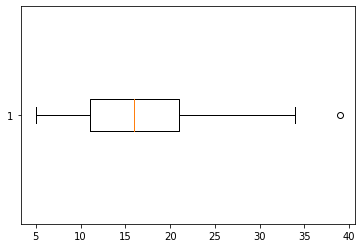

In [ ]:
bpMax = plt.boxplot(df_weather["MAX_TEMPERATURE_C"],vert=False)
#une donnée est une donnée extrème

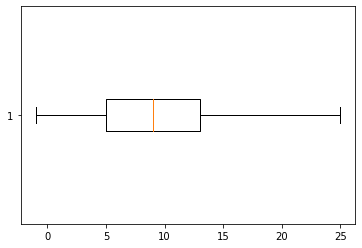

In [ ]:
bpMin = plt.boxplot(df_weather["MIN_TEMPERATURE_C"],vert=False)
#pas de données extrèmes

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

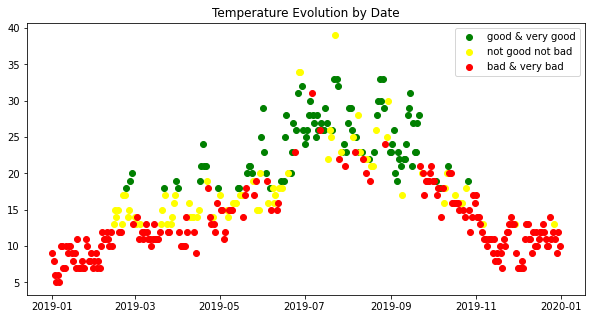

In [15]:
goodVeryGood = df_weather.loc[(df_weather['OPINION'] == 'good') | (df_weather['OPINION'] == 'very good')]
notGoodNotBad = df_weather.loc[(df_weather['OPINION'] == 'not good not bad')]
badVeryBad = df_weather.loc[(df_weather['OPINION'] == 'bad') | (df_weather['OPINION'] == 'very bad')]

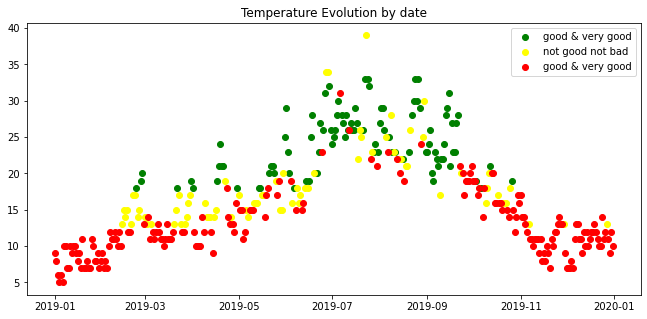

In [26]:
# Taille
plt.figure(figsize=(11, 5))

# Graphiques
plt.scatter(x = goodVeryGood["DATE"], y = goodVeryGood['MAX_TEMPERATURE_C'], label ='good & very good', c= 'green')
plt.scatter(x = notGoodNotBad["DATE"], y = notGoodNotBad['MAX_TEMPERATURE_C'], label ='not good not bad', c= 'yellow')
plt.scatter(x = badVeryBad["DATE"], y = badVeryBad['MAX_TEMPERATURE_C'], label ='good & very good', c= 'red')

# Titre et Légende
plt.legend()
plt.title('Temperature Evolution by date')

# Show
plt.show()